In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.optimizers import Adam
warnings.filterwarnings("ignore")




ModuleNotFoundError: No module named 'seaborn'

In [36]:
from google.cloud import storage

# Initialize the Google Cloud clients
client = storage.Client()

# Specify your bucket and blob (file) path
bucket_name = 'weather_data_bug_squashers'
blob_name = 'weather_cleaned.csv'

# Get the bucket and the blob
bucket = client.get_bucket(bucket_name)
blob = bucket.blob(blob_name)

# Download the file to the local runtime
blob.download_to_filename('weather_cleaned.csv')

In [43]:
import psutil

# Get total and available memory
total_memory = psutil.virtual_memory().total / (1024 ** 3)  # in GB
available_memory = psutil.virtual_memory().available / (1024 ** 3)  # in GB

print(f"Total RAM: {total_memory:.2f} GB")
print(f"Available RAM: {available_memory:.2f} GB")


Total RAM: 754.39 GB
Available RAM: 719.46 GB


In [116]:
df=pd.read_csv("weather_cleaned.csv")

In [117]:
df.head()

,time,temp_2m,humidity_2m,dew_point_2m,precip,snowfall,snow_depth,msl_pressure,surface_pressure,cloud_cover_low,...,weather_Drizzle: Moderate,weather_Mainly clear,weather_Overcast,weather_Partly cloudy,weather_Rain: Heavy,weather_Rain: Moderate,weather_Rain: Slight,weather_Snow fall: Heavy,weather_Snow fall: Moderate,weather_Snow fall: Slight
0,2000-01-01 00:00:00,41.9,69,32.4,0.0,0.0,0.0,1019.6,1001.7,0,...,False,False,False,False,False,False,False,False,False,False
1,2000-01-01 01:00:00,39.5,74,31.9,0.0,0.0,0.0,1019.1,1001.1,0,...,False,False,False,False,False,False,False,False,False,False
2,2000-01-01 02:00:00,37.7,78,31.4,0.0,0.0,0.0,1019.1,1001.0,0,...,False,False,False,False,False,False,False,False,False,False
3,2000-01-01 03:00:00,36.4,80,30.9,0.0,0.0,0.0,1018.9,1000.8,0,...,False,False,False,False,False,False,False,False,False,False
4,2000-01-01 04:00:00,35.5,82,30.4,0.0,0.0,0.0,1019.0,1000.8,0,...,False,False,False,False,False,False,False,False,False,False


In [92]:
df_pivot =df.pivot_table(index='time', columns='location_city', values=['temp_2m', 'humidity_2m', 'dew_point_2m', 'precip', 'snowfall', 'snow_depth', 'msl_pressure', 'surface_pressure', 'cloud_cover_low'])
df_pivot.columns = ['_'.join(col) for col in df_pivot.columns]
df_pivot.sort_index()

,cloud_cover_low_Chicago,cloud_cover_low_Houston,cloud_cover_low_Los Angeles,cloud_cover_low_New York City,cloud_cover_low_St. Louis,dew_point_2m_Chicago,dew_point_2m_Houston,dew_point_2m_Los Angeles,dew_point_2m_New York City,dew_point_2m_St. Louis,...,surface_pressure_Chicago,surface_pressure_Houston,surface_pressure_Los Angeles,surface_pressure_New York City,surface_pressure_St. Louis,temp_2m_Chicago,temp_2m_Houston,temp_2m_Los Angeles,temp_2m_New York City,temp_2m_St. Louis
time,,,,,,,,,,,,,,,,,,,,,
2000-01-01 00:00:00,0,0,47,0,0,25.5,46.9,42.0,27.2,32.4,...,988.4,1013.9,1005.3,1017.0,1001.7,32.8,63.0,53.2,29.9,41.9
2000-01-01 01:00:00,0,0,31,0,0,25.4,46.7,42.3,26.2,31.9,...,988.0,1014.4,1005.7,1017.6,1001.1,32.1,58.9,51.6,28.3,39.5
2000-01-01 02:00:00,0,0,19,0,0,25.6,46.9,42.7,25.9,31.4,...,987.5,1014.6,1005.9,1017.8,1001.0,32.2,55.3,50.6,27.7,37.7
2000-01-01 03:00:00,0,0,17,0,0,26.0,46.5,43.2,25.8,30.9,...,987.1,1015.0,1006.0,1018.2,1000.8,32.6,52.7,49.8,27.4,36.4
2000-01-01 04:00:00,0,0,10,1,0,27.0,45.8,43.9,25.9,30.4,...,986.6,1015.1,1006.0,1018.6,1000.8,32.8,51.6,48.6,27.4,35.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-11 19:00:00,0,0,0,0,0,43.7,56.5,44.4,37.9,52.5,...,989.8,1018.1,1005.8,1011.9,1003.3,81.0,85.9,84.9,69.9,79.6
2024-10-11 20:00:00,0,0,0,0,0,41.1,56.6,42.7,38.4,52.5,...,989.0,1017.2,1005.4,1011.3,1002.4,82.0,86.7,87.9,69.9,80.6
2024-10-11 21:00:00,0,0,0,0,0,39.8,56.2,46.8,39.1,52.3,...,988.5,1016.9,1004.9,1010.8,1001.8,81.6,86.9,87.7,69.1,81.1


In [86]:
df[df['time'] == '2000-01-01 00:00:00']

,time,temp_2m,humidity_2m,dew_point_2m,precip,snowfall,snow_depth,msl_pressure,surface_pressure,cloud_cover_low,...,weather_Drizzle: Moderate,weather_Mainly clear,weather_Overcast,weather_Partly cloudy,weather_Rain: Heavy,weather_Rain: Moderate,weather_Rain: Slight,weather_Snow fall: Heavy,weather_Snow fall: Moderate,weather_Snow fall: Slight
0,2000-01-01 00:00:00,41.9,69,32.4,0.0,0.0,0.00,1019.6,1001.7,0,...,False,False,False,False,False,False,False,False,False,False
217224,2000-01-01 00:00:00,29.9,90,27.2,0.0,0.0,0.00,1021.1,1017.0,0,...,False,False,False,False,False,False,False,False,False,False
434448,2000-01-01 00:00:00,53.2,66,42.0,0.0,0.0,0.00,1016.3,1005.3,47,...,False,False,False,True,False,False,False,False,False,False
651672,2000-01-01 00:00:00,32.8,74,25.5,0.0,0.0,0.01,1018.5,988.4,0,...,False,False,False,False,False,False,False,False,False,False
868896,2000-01-01 00:00:00,63.0,56,46.9,0.0,0.0,0.00,1016.3,1013.9,0,...,False,False,False,False,False,False,False,False,False,False


In [46]:
df.set_index('time', inplace=True)

In [47]:
df.columns

Index(['temp_2m', 'humidity_2m', 'dew_point_2m', 'precip', 'snowfall',
       'snow_depth', 'msl_pressure', 'surface_pressure', 'cloud_cover_low',
       'cloud_cover_mid', 'cloud_cover_high', 'et0', 'vpd', 'wind_speed_10m',
       'wind_dir_10m', 'soil_temp_0_7cm', 'soil_moisture_0_7cm',
       'location_city', 'latitude', 'longitude', 'weather_Clear sky',
       'weather_Drizzle: Dense', 'weather_Drizzle: Light',
       'weather_Drizzle: Moderate', 'weather_Mainly clear', 'weather_Overcast',
       'weather_Partly cloudy', 'weather_Rain: Heavy',
       'weather_Rain: Moderate', 'weather_Rain: Slight',
       'weather_Snow fall: Heavy', 'weather_Snow fall: Moderate',
       'weather_Snow fall: Slight'],
      dtype='object')

In [118]:
df.head(20)

,time,temp_2m,humidity_2m,dew_point_2m,precip,snowfall,snow_depth,msl_pressure,surface_pressure,cloud_cover_low,...,weather_Drizzle: Moderate,weather_Mainly clear,weather_Overcast,weather_Partly cloudy,weather_Rain: Heavy,weather_Rain: Moderate,weather_Rain: Slight,weather_Snow fall: Heavy,weather_Snow fall: Moderate,weather_Snow fall: Slight
0,2000-01-01 00:00:00,41.9,69,32.4,0.0,0.0,0.0,1019.6,1001.7,0,...,False,False,False,False,False,False,False,False,False,False
1,2000-01-01 01:00:00,39.5,74,31.9,0.0,0.0,0.0,1019.1,1001.1,0,...,False,False,False,False,False,False,False,False,False,False
2,2000-01-01 02:00:00,37.7,78,31.4,0.0,0.0,0.0,1019.1,1001.0,0,...,False,False,False,False,False,False,False,False,False,False
3,2000-01-01 03:00:00,36.4,80,30.9,0.0,0.0,0.0,1018.9,1000.8,0,...,False,False,False,False,False,False,False,False,False,False
4,2000-01-01 04:00:00,35.5,82,30.4,0.0,0.0,0.0,1019.0,1000.8,0,...,False,False,False,False,False,False,False,False,False,False
5,2000-01-01 05:00:00,34.6,83,30.1,0.0,0.0,0.0,1019.0,1000.8,0,...,False,False,False,False,False,False,False,False,False,False
6,2000-01-01 06:00:00,33.6,85,29.6,0.0,0.0,0.0,1018.8,1000.6,0,...,False,False,False,False,False,False,False,False,False,False
7,2000-01-01 07:00:00,32.8,86,29.0,0.0,0.0,0.0,1018.1,999.9,0,...,False,False,False,False,False,False,False,False,False,False
8,2000-01-01 08:00:00,31.8,87,28.4,0.0,0.0,0.0,1017.8,999.5,0,...,False,False,False,False,False,False,False,False,False,False
9,2000-01-01 09:00:00,31.1,89,28.2,0.0,0.0,0.0,1017.8,999.5,0,...,False,False,False,False,False,False,False,False,False,False


In [119]:
import pandas as pd
import numpy as np
import torch

# Convert boolean columns to integers (0 and 1)
df = df.applymap(lambda x: int(x) if isinstance(x, bool) else x)

# Encode the city names as integers
df['city_idx'] = df['location_city'].astype('category').cat.codes  # Numeric index for each city
features = ['humidity_2m', 'dew_point_2m', 'precip', 'snowfall', 'snow_depth', 
            'msl_pressure', 'surface_pressure', 'cloud_cover_low', 'cloud_cover_mid',
            'cloud_cover_high', 'et0', 'vpd', 'wind_speed_10m', 'wind_dir_10m', 
            'soil_temp_0_7cm', 'soil_moisture_0_7cm', 'latitude', 'longitude'] + \
           [col for col in df.columns if col.startswith('weather_')]

target = 'temp_2m'
T = 5  # Number of timesteps
input_dim = len(features)

# Lists to hold training and testing data across all cities
X_train_list, y_train_list, city_train_list = [], [], []
X_test_list, y_test_list, city_test_list = [], [], []

# To compute normalization statistics
all_train_data = []

# Process each city independently
for city_id, city_data in df.groupby('city_idx'):
    city_data = city_data.sort_values(by='time').reset_index(drop=True)
    input_data = city_data[features].values
    targets = city_data[target].values
    
    # Determine train size for the current city
    N = len(input_data) - T  # Total number of sequences
    train_size = int(0.80 * N)
    
    # Split data for normalization calculation (only on training set)
    train_data = input_data[:train_size]
    all_train_data.append(train_data)  # Collect all training data for global normalization
    
    # Convert to torch tensors
    input_data_tensor = torch.tensor(input_data, dtype=torch.float32)
    target_tensor = torch.tensor(targets, dtype=torch.float32)
    
    # Initialize train and test tensors for this city
    X_train_city = torch.zeros((train_size, T, input_dim), dtype=torch.float32)
    y_train_city = torch.zeros((train_size, 1), dtype=torch.float32)
    X_test_city = torch.zeros((N - train_size, T, input_dim), dtype=torch.float32)
    y_test_city = torch.zeros((N - train_size, 1), dtype=torch.float32)
    
    # Prepare training sequences
    for t in range(train_size):
        X_train_city[t] = input_data_tensor[t:t + T]
        y_train_city[t] = target_tensor[t + T]
    
    # Prepare testing sequences
    for i in range(N - train_size):
        t = i + train_size
        X_test_city[i] = input_data_tensor[t:t + T]
        y_test_city[i] = target_tensor[t + T]
    
    # Prepare city indices for train and test
    city_train_city = torch.full((train_size,), city_id, dtype=torch.long)
    city_test_city = torch.full((N - train_size,), city_id, dtype=torch.long)
    
    # Append city-specific data to the main lists
    X_train_list.append(X_train_city)
    y_train_list.append(y_train_city)
    city_train_list.append(city_train_city)
    
    X_test_list.append(X_test_city)
    y_test_list.append(y_test_city)
    city_test_list.append(city_test_city)

# Concatenate all training data for normalization calculation
all_train_data = np.vstack(all_train_data)
train_mean = all_train_data.mean(axis=0)
train_std = all_train_data.std(axis=0)

# Concatenate all cities’ data to form the final tensors
X_train = torch.cat(X_train_list, dim=0)
y_train = torch.cat(y_train_list, dim=0)
city_train = torch.cat(city_train_list, dim=0)

X_test = torch.cat(X_test_list, dim=0)
y_test = torch.cat(y_test_list, dim=0)
city_test = torch.cat(city_test_list, dim=0)

# Normalize X_train and X_test
train_mean_tensor = torch.tensor(train_mean, dtype=torch.float32)
train_std_tensor = torch.tensor(train_std, dtype=torch.float32)

# Normalize along the feature dimension (last dimension)
X_train = (X_train - train_mean_tensor) / train_std_tensor
X_test = (X_test - train_mean_tensor) / train_std_tensor

# Print shapes to confirm the results
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("city_train shape:", city_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
print("city_test shape:", city_test.shape)


X_train shape: torch.Size([868875, 5, 31])
y_train shape: torch.Size([868875, 1])
city_train shape: torch.Size([868875])
X_test shape: torch.Size([217220, 5, 31])
y_test shape: torch.Size([217220, 1])
city_test shape: torch.Size([217220])


In [120]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

class LSTMModelWithEmbedding(nn.Module):
    def __init__(self, input_dim, num_cities, embedding_dim=16):
        super().__init__()
        # Embedding for city index
        self.city_embedding = nn.Embedding(num_embeddings=num_cities, embedding_dim=embedding_dim)
        
        # LSTM layer with bidirectional setting
        self.lstm = nn.LSTM(input_size=input_dim  + embedding_dim, 
                            hidden_size=128, 
                            num_layers=2, 
                            batch_first=True, 
                            bidirectional=True)
        
        # Fully connected layers
        self.dropout = nn.Dropout(0.2)
        self.linear1 = nn.Linear(128 * 2 , 64)  # Adjust for concatenation
        self.linear2 = nn.Linear(64, 8)
        self.output_linear = nn.Linear(8, 1)
        
    def forward(self, x, city_idx):
        # Get city embedding and repeat for each timestep
       
        city_emb = self.city_embedding(city_idx).unsqueeze(1).expand(-1, x.size(1), -1)
        
     
        
        # Concatenate city embedding with each timestep in the sequence
        x = torch.cat([x, city_emb], dim=2)
        
      
        
        # Pass through LSTM
        x, _ = self.lstm(x)
        x = x[:, -1, :]  # Take the output from the last timestep
        
        # Pass through fully connected layers
        x = self.dropout(x)
        x = self.linear1(x)
        x = self.linear2(x)
        x = self.output_linear(x)
        return x


# Hyperparameters
input_dim = X_train.shape[2]  # Number of features
num_cities = city_train.max().item() + 1  # Total number of unique cities
epochs = 1000
batch_size = 64
embedding_dim = 4  # Dimension of the embedding layer

# Initialize model, criterion, and optimizer
model = LSTMModelWithEmbedding(input_dim=input_dim, num_cities=num_cities, embedding_dim=embedding_dim).to(device)
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)

# Convert data to PyTorch tensors and move to device
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).to(device)
city_train_tensor = torch.tensor(city_train, dtype=torch.long).to(device)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).to(device)
city_test_tensor = torch.tensor(city_test, dtype=torch.long).to(device)

# DataLoader for batching
train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor, city_train_tensor)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataset = torch.utils.data.TensorDataset(X_test_tensor, y_test_tensor, city_test_tensor)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

import matplotlib.pyplot as plt

# Lists to store train and validation loss
train_losses = []
val_losses = []

# Training loop
for epoch in range(epochs):
    model.train()
    train_loss = 0
    for X_batch, y_batch, city_batch in train_loader:
        optimizer.zero_grad()
        output = model(X_batch, city_batch)
        loss = loss_fn(output.squeeze(), y_batch.squeeze())
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item() * X_batch.size(0)

    # Validation step
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for X_batch, y_batch, city_batch in test_loader:
            output = model(X_batch, city_batch)
            loss = loss_fn(output.squeeze(), y_batch.squeeze())
            val_loss += loss.item() * X_batch.size(0)

    # Calculate average losses
    train_loss /= len(train_loader.dataset)
    val_loss /= len(test_loader.dataset)
    
    # Append losses for plotting
    train_losses.append(train_loss)
    val_losses.append(val_loss)

    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")
    
    # Save the model every 50 epochs
    if (epoch + 1) % 10 == 0:
        checkpoint_path = f"/home/research/a.naveen/denoise40/weather/lstm/epoch_{epoch+1}.pth"
        torch.save({
            'epoch': epoch + 1,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'train_loss': train_loss,
            'val_loss': val_loss
        }, checkpoint_path)
        print(f"Model saved at {checkpoint_path}")


Using device: cuda


/tmp/ipykernel_1296287/2348529204.py:65: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
/tmp/ipykernel_1296287/2348529204.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train_tensor = torch.tensor(y_train, dtype=torch.float32).to(device)
/tmp/ipykernel_1296287/2348529204.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  city_train_tensor = torch.tensor(city_train, dtype=torch.long).to(device)
/tmp/ipykernel_1296287/2348529204.py:69: UserWarning: To copy const

Epoch 1/1000, Train Loss: 14.1475, Validation Loss: 2.0083
Epoch 2/1000, Train Loss: 1.8734, Validation Loss: 1.9662
Epoch 3/1000, Train Loss: 1.4000, Validation Loss: 1.7960
Epoch 4/1000, Train Loss: 1.3142, Validation Loss: 1.7945
Epoch 5/1000, Train Loss: 1.2694, Validation Loss: 1.8752
Epoch 6/1000, Train Loss: 1.2407, Validation Loss: 1.5749
Epoch 7/1000, Train Loss: 1.2162, Validation Loss: 1.6210
Epoch 8/1000, Train Loss: 1.1952, Validation Loss: 1.6246
Epoch 9/1000, Train Loss: 1.1769, Validation Loss: 1.5779
Epoch 10/1000, Train Loss: 1.1666, Validation Loss: 1.5741
Model saved at /home/research/a.naveen/denoise40/weather/lstm/epoch_10.pth
Epoch 11/1000, Train Loss: 1.1578, Validation Loss: 1.5878
Epoch 12/1000, Train Loss: 1.1471, Validation Loss: 1.5075
Epoch 13/1000, Train Loss: 1.1354, Validation Loss: 1.5274
Epoch 14/1000, Train Loss: 1.1292, Validation Loss: 1.5131
Epoch 15/1000, Train Loss: 1.1219, Validation Loss: 1.5860
Epoch 16/1000, Train Loss: 1.1189, Validation Lo

KeyboardInterrupt: 

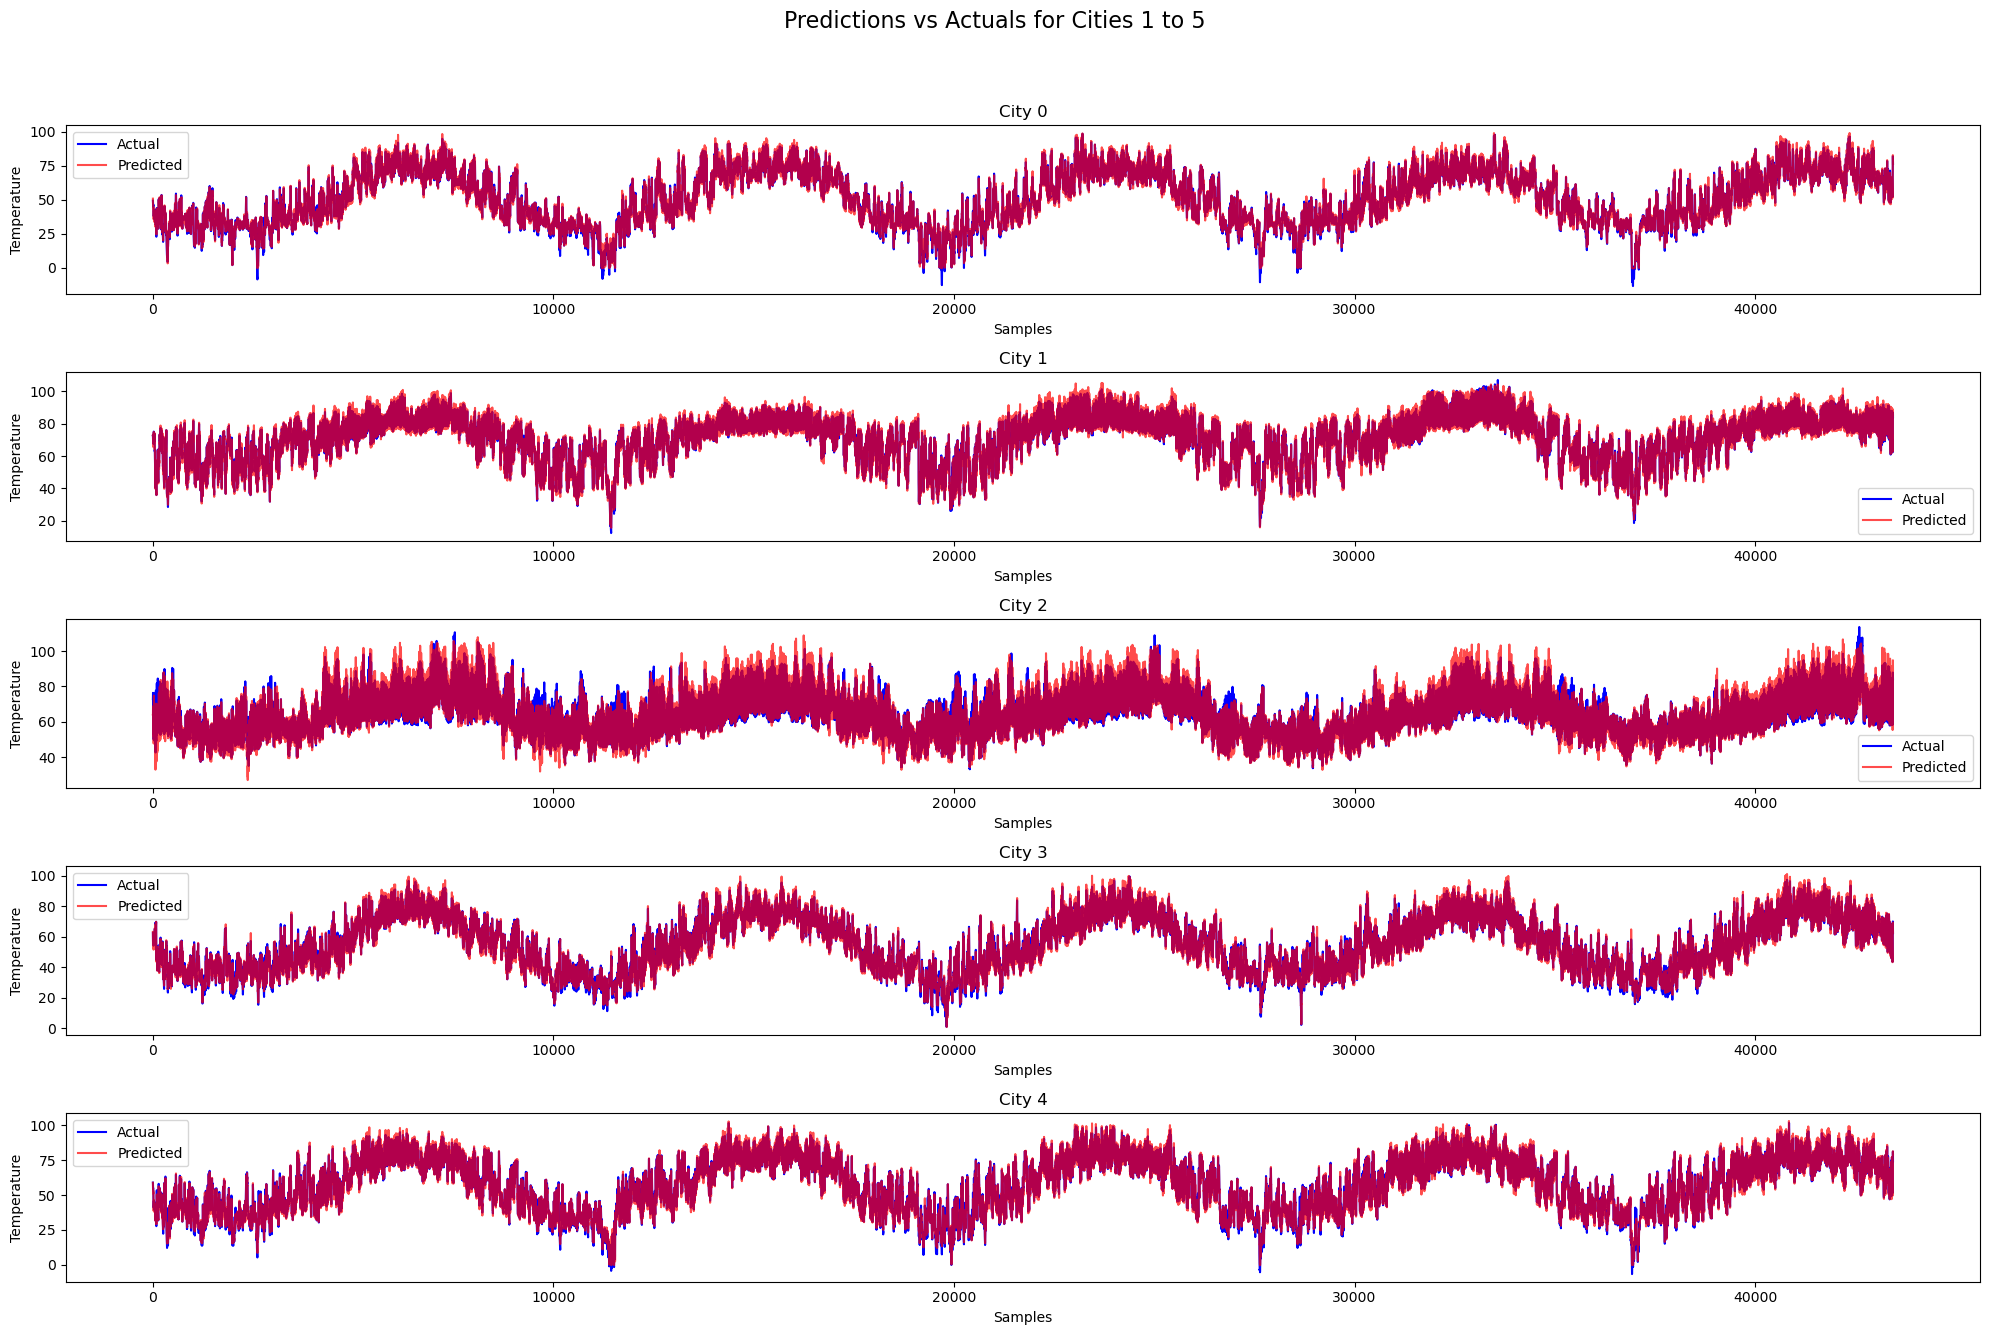

In [113]:
import matplotlib.pyplot as plt
import numpy as np

# Generate predictions on the test set, grouped by city
model.eval()
predictions = []
actuals = []
city_indices = []

with torch.no_grad():
    for X_batch, y_batch, city_batch in test_loader:
        output = model(X_batch, city_batch)
        predictions.extend(output.cpu().numpy())
        actuals.extend(y_batch.cpu().numpy())
        city_indices.extend(city_batch.cpu().numpy())

# Convert lists to NumPy arrays
predictions = np.array(predictions).squeeze()
actuals = np.array(actuals).squeeze()
city_indices = np.array(city_indices)

# Get unique city indices for plotting city-wise
unique_cities = np.unique(city_indices)
num_cities = len(unique_cities)

# Plot predictions vs actual values for each city with subplots, 5 per figure
cities_per_fig = 5
num_figs = int(np.ceil(num_cities / cities_per_fig))

for fig_num in range(num_figs):
    start_idx = fig_num * cities_per_fig
    end_idx = min(start_idx + cities_per_fig, num_cities)
    cities_to_plot = unique_cities[start_idx:end_idx]
    
    fig, axes = plt.subplots(len(cities_to_plot), 1, figsize=(20, 14))
    fig.suptitle(f'Predictions vs Actuals for Cities {start_idx + 1} to {end_idx}', fontsize=16)
    
    if len(cities_to_plot) == 1:
        axes = [axes]  # Ensure axes is iterable if only one subplot

    for ax, city_id in zip(axes, cities_to_plot):
        city_mask = city_indices == city_id
        city_predictions = predictions[city_mask]
        city_actuals = actuals[city_mask]
        
        ax.plot(city_actuals, label='Actual', color='blue')
        ax.plot(city_predictions, label='Predicted', color='red', alpha=0.7)
        ax.set_title(f'City {city_id}')
        ax.set_xlabel('Samples')
        ax.set_ylabel('Temperature')
        ax.legend()
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit the title
    plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Generate predictions on the test set
model.eval()
predictions = []
actuals = []

with torch.no_grad():
    for X_batch, y_batch, city_batch in test_loader:
        output = model(X_batch, city_batch)
        predictions.extend(output.cpu().numpy())
        actuals.extend(y_batch.cpu().numpy())

# Convert predictions and actuals to NumPy arrays for plotting
predictions = np.array(predictions).squeeze()
actuals = np.array(actuals).squeeze()

# Plot predicted vs actual values
plt.figure(figsize=(12, 6))
plt.plot(actuals, label='Actual', color='blue')
plt.plot(predictions, label='Predicted', color='red', alpha=0.7)
plt.xlabel('Samples')
plt.ylabel('Temperature')
plt.title('Model Predictions vs Actual Values')
plt.legend()
plt.show()


In [49]:
# Convert boolean columns to integers (0 and 1)
df = df.applymap(lambda x: int(x) if isinstance(x, bool) else x)

dates= df.index.values  
loc_city=df['location_city'].values
input_data = df.drop(['location_city'], axis=1).values
targets = df['temp_2m'].values
T =5               #Number of timesteps to look while predicting
D = input_data.shape[1]   #Dimensionality of the input
N = len(input_data) - T

In [50]:
import torch

# Train size: 80% of the total data size
train_size = int(len(input_data) * 0.80)

# Convert input data to a PyTorch tensor
input_data = torch.tensor(input_data, dtype=torch.float32)


# Preparing X_train and y_train
X_train = torch.zeros((train_size, T, D), dtype=torch.float32)
y_train = torch.zeros((train_size, 1), dtype=torch.float32)


for t in range(train_size):
    X_train[t, :, :] = input_data[t:t+T]
    y_train[t] = targets[t + T]
   

#Preparing X_test and y_test
X_test = torch.zeros((N - train_size, T, D), dtype=torch.float32)
y_test = torch.zeros((N - train_size, 1), dtype=torch.float32)


for i in range(N - train_size):
    t = i + train_size
    X_test[i, :, :] = input_data[t:t+T]
    y_test[i] = targets[t + T]
  

In [52]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

class LSTMModel(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.lstm = nn.LSTM(input_size =  input_dim, 
                            num_layers = 2,
                            hidden_size = 128,  
                            batch_first = True, 
                            bidirectional= True)
        
        self.dropout = nn.Dropout(0.2)
        self.linear1 = nn.Linear(128*2, 64) 
        self.linear2 = nn.Linear(64, 8) 
        self.output_linear = nn.Linear(8, 1)
        
        
    def forward(self, x):  
        x, _ = self.lstm(x)
        x = x[:, -1, :] 
        x = self.dropout(x)
        x = self.linear1(x)
        x = self.linear2(x)
        x = self.output_linear(x)
        return x
        
        
# Hyperparameters
input_dim = X_train.shape[2]  # Number of features
epochs = 1000
batch_size = 64

# Initialize model, criterion, and optimizer
model = LSTMModel(input_dim).to(device)
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr = 1e-3, weight_decay = 1e-5)

# Convert data to PyTorch tensors and move to device
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).to(device)

# DataLoader for batching
train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataset = torch.utils.data.TensorDataset(X_test_tensor, y_test_tensor)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)



import matplotlib.pyplot as plt

# Lists to store train and validation loss
train_losses = []
val_losses = []

# Training loop
for epoch in range(epochs):
    model.train()
    train_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        output = model(X_batch)
        loss = loss_fn(output.squeeze(), y_batch.squeeze())
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item() * X_batch.size(0)

    # Validation step
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            output = model(X_batch)
            loss = loss_fn(output.squeeze(), y_batch.squeeze())
            val_loss += loss.item() * X_batch.size(0)

    # Calculate average losses
    train_loss /= len(train_loader.dataset)
    val_loss /= len(test_loader.dataset)
    
    # Append losses for plotting
    train_losses.append(train_loss)
    val_losses.append(val_loss)

    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")
    
    # Save the model every 50 epochs
    if (epoch + 1) % 50 == 0:
        checkpoint_path = f"/home/research/a.naveen/denoise40/weather/lstm/epoch_{epoch+1}.pth"
        torch.save({
            'epoch': epoch + 1,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'train_loss': train_loss,
            'val_loss': val_loss
        }, checkpoint_path)
        print(f"Model saved at {checkpoint_path}")

    



Using device: cuda


/tmp/ipykernel_1296287/1482378255.py:45: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
/tmp/ipykernel_1296287/1482378255.py:46: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train_tensor = torch.tensor(y_train, dtype=torch.float32).to(device)
/tmp/ipykernel_1296287/1482378255.py:47: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
/tmp/ipykernel_1296287/1482378255.py:48: UserWarning: To copy construct 

Epoch 1/1000, Train Loss: 12.9742, Validation Loss: 1.7605
Epoch 2/1000, Train Loss: 2.0052, Validation Loss: 1.5791
Epoch 3/1000, Train Loss: 1.5428, Validation Loss: 1.4946
Epoch 4/1000, Train Loss: 1.4543, Validation Loss: 1.9665
Epoch 5/1000, Train Loss: 1.4079, Validation Loss: 1.5050
Epoch 6/1000, Train Loss: 1.3740, Validation Loss: 1.8983
Epoch 7/1000, Train Loss: 1.3490, Validation Loss: 1.4125
Epoch 8/1000, Train Loss: 1.3291, Validation Loss: 1.5414
Epoch 9/1000, Train Loss: 1.3092, Validation Loss: 1.8796
Epoch 10/1000, Train Loss: 1.2937, Validation Loss: 1.7391
Epoch 11/1000, Train Loss: 1.2840, Validation Loss: 1.8222
Epoch 12/1000, Train Loss: 1.2710, Validation Loss: 1.9962
Epoch 13/1000, Train Loss: 1.2622, Validation Loss: 2.5846
Epoch 14/1000, Train Loss: 1.2510, Validation Loss: 2.2652
Epoch 15/1000, Train Loss: 1.2442, Validation Loss: 2.0879
Epoch 16/1000, Train Loss: 1.2369, Validation Loss: 2.6087
Epoch 17/1000, Train Loss: 1.2268, Validation Loss: 1.9410
Epoch

KeyboardInterrupt: 

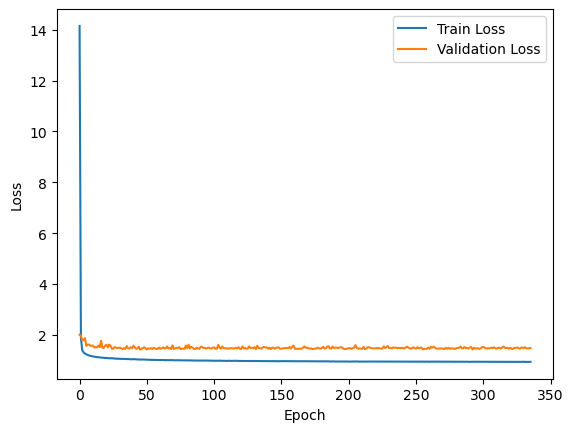

In [121]:
# Plot train and validation loss
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

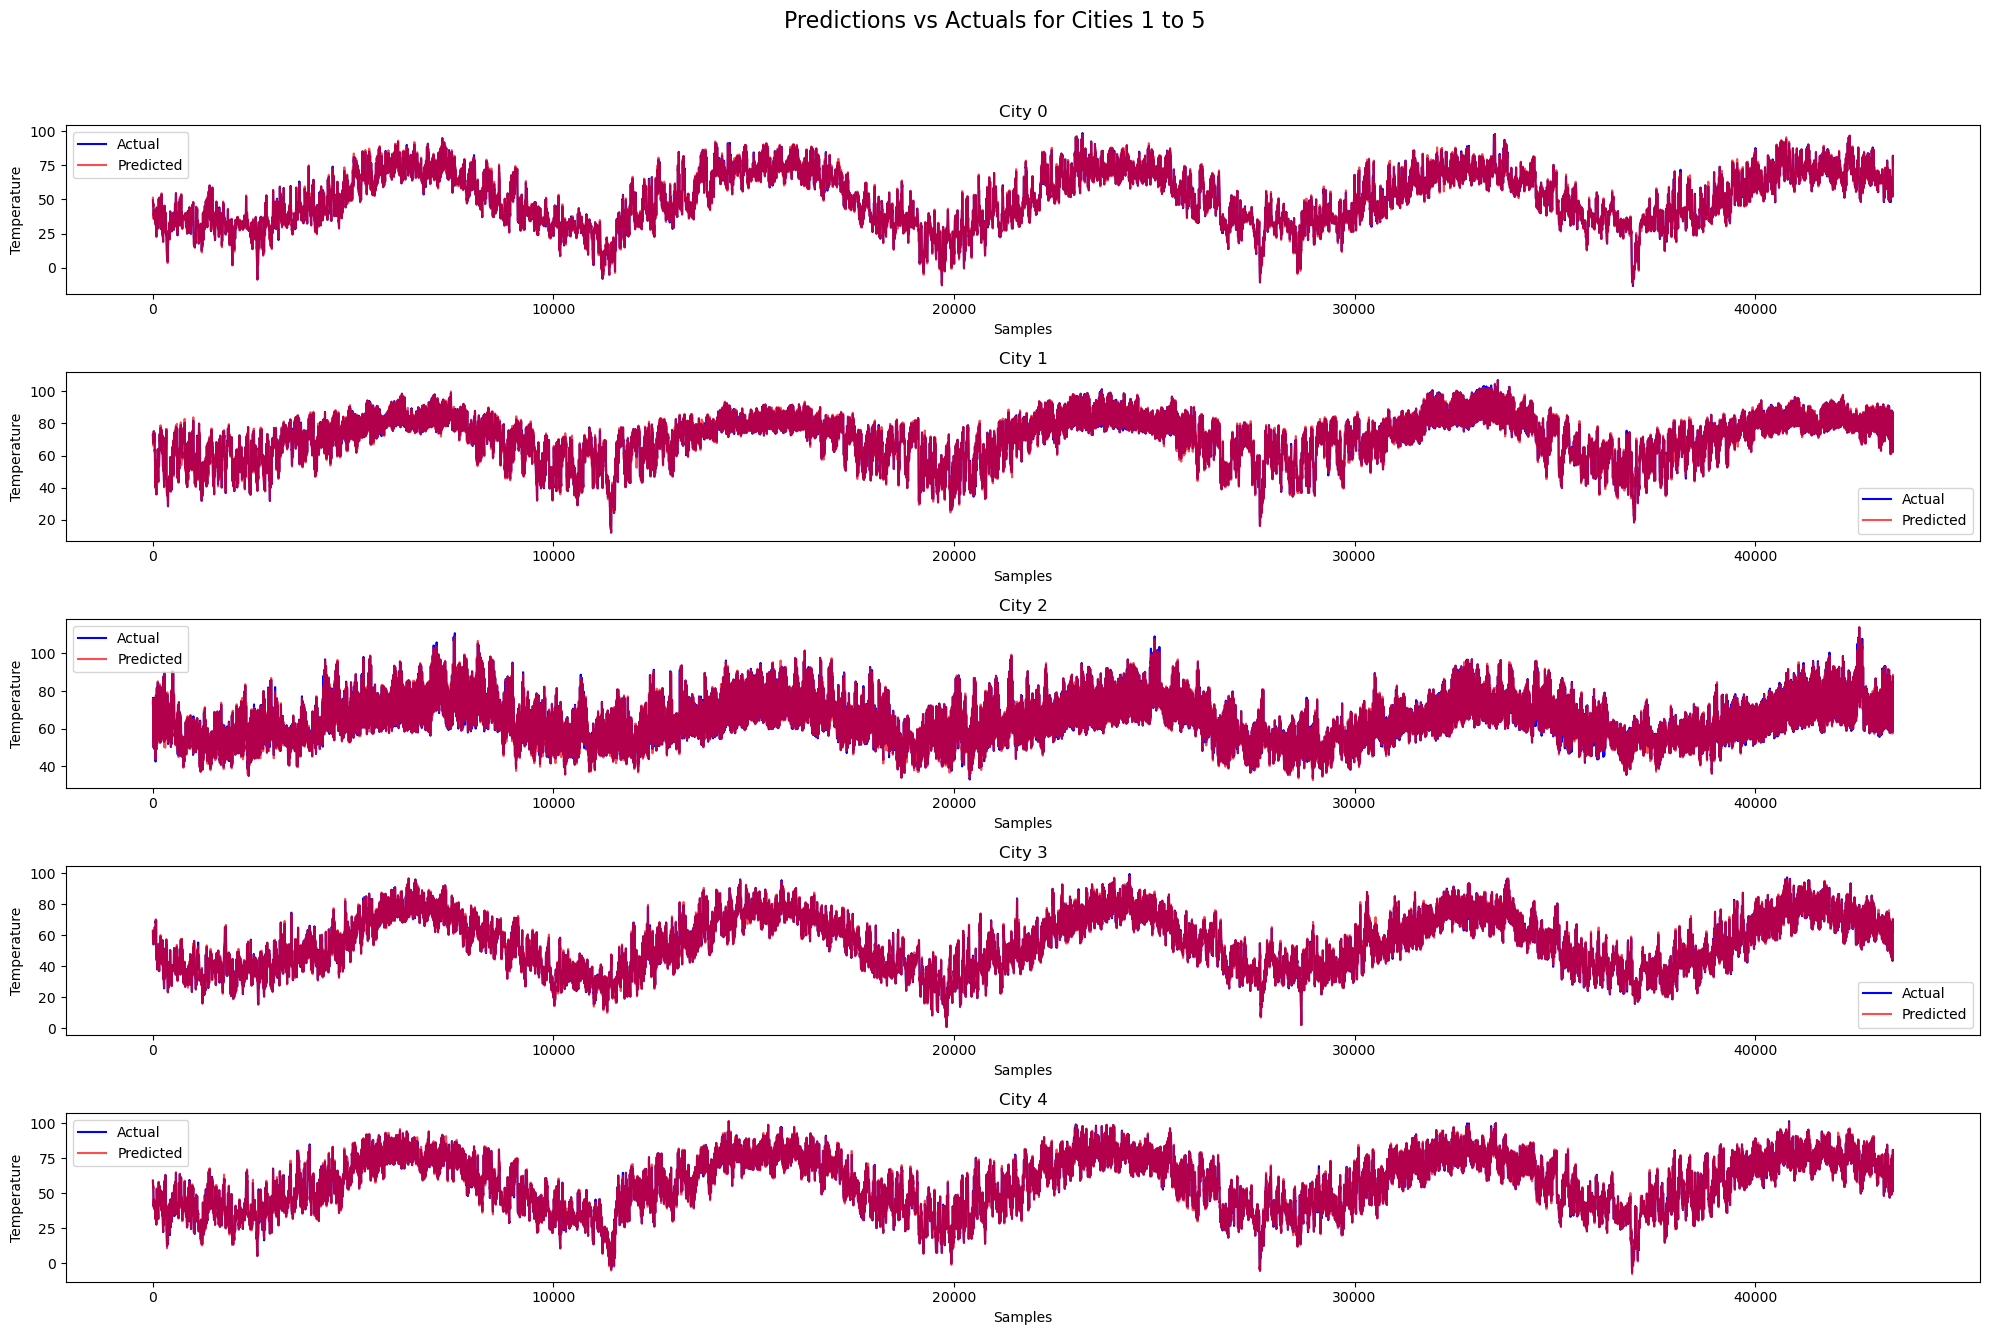

In [122]:
import matplotlib.pyplot as plt
import numpy as np

# Generate predictions on the test set, grouped by city
model.eval()
predictions = []
actuals = []
city_indices = []

with torch.no_grad():
    for X_batch, y_batch, city_batch in test_loader:
        output = model(X_batch, city_batch)
        predictions.extend(output.cpu().numpy())
        actuals.extend(y_batch.cpu().numpy())
        city_indices.extend(city_batch.cpu().numpy())

# Convert lists to NumPy arrays
predictions = np.array(predictions).squeeze()
actuals = np.array(actuals).squeeze()
city_indices = np.array(city_indices)

# Get unique city indices for plotting city-wise
unique_cities = np.unique(city_indices)
num_cities = len(unique_cities)

# Plot predictions vs actual values for each city with subplots, 5 per figure
cities_per_fig = 5
num_figs = int(np.ceil(num_cities / cities_per_fig))

for fig_num in range(num_figs):
    start_idx = fig_num * cities_per_fig
    end_idx = min(start_idx + cities_per_fig, num_cities)
    cities_to_plot = unique_cities[start_idx:end_idx]
    
    fig, axes = plt.subplots(len(cities_to_plot), 1, figsize=(20, 14))
    fig.suptitle(f'Predictions vs Actuals for Cities {start_idx + 1} to {end_idx}', fontsize=16)
    
    if len(cities_to_plot) == 1:
        axes = [axes]  # Ensure axes is iterable if only one subplot

    for ax, city_id in zip(axes, cities_to_plot):
        city_mask = city_indices == city_id
        city_predictions = predictions[city_mask]
        city_actuals = actuals[city_mask]
        
        ax.plot(city_actuals, label='Actual', color='blue')
        ax.plot(city_predictions, label='Predicted', color='red', alpha=0.7)
        ax.set_title(f'City {city_id}')
        ax.set_xlabel('Samples')
        ax.set_ylabel('Temperature')
        ax.legend()
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit the title
    plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Set model to evaluation mode
model.eval()

# Make predictions on the test set
with torch.no_grad():
    predictions = []
    for X_batch in X_test:
        X_batch = X_batch.unsqueeze(0).to(device)  # Add batch dimension and move to device
        output = model(X_batch)
        predictions.append(output.item())

# Convert predictions and y_test to numpy arrays
predictions = torch.tensor(predictions).cpu().numpy()
y_test_np = y_test.cpu().numpy()

# Create DataFrame for plotting with dates as the index
results_df = pd.DataFrame({
    "date": test_dates,
    "actual_temperature": y_test_np.squeeze(),
    "predicted_temperature": predictions
})
results_df.set_index("date", inplace=True)

# Plotting the actual vs predicted values with dates
plt.figure(figsize=(12, 6))
plt.plot(results_df["actual_temperature"], label="Actual Temperature", color="blue", linewidth=1)
plt.plot(results_df["predicted_temperature"], label="Predicted Temperature", color="red", linestyle="--", linewidth=1)
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.title("Actual vs Predicted Temperature")
plt.legend()
plt.show()


In [74]:
dates

array(['2000-01-01 00:00:00', '2000-01-01 01:00:00',
       '2000-01-01 02:00:00', ..., '2024-10-11 21:00:00',
       '2024-10-11 22:00:00', '2024-10-11 23:00:00'], dtype=object)

In [78]:
import numpy
unique_dates, counts = numpy.unique(dates, return_counts=True)
duplicate_dates = unique_dates[counts > 1]  # Dates with counts greater than 1


In [82]:
dates.shape

(1086120,)

In [21]:


# Define the model
model = Sequential()

# Bidirectional LSTM layer (captures dependencies from both directions)
model.add(Bidirectional(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))))

# Batch Normalization to stabilize training
model.add(BatchNormalization())

# Dropout for regularization to prevent overfitting
model.add(Dropout(0.2))

# Another LSTM layer with dropout
model.add(LSTM(units=64, return_sequences=False))

# Batch Normalization
model.add(BatchNormalization())

# Dropout
model.add(Dropout(0.2))

# Dense layer for output prediction
model.add(Dense(units=1))  # Single output for regression

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])




In [22]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))


Train on 868896 samples, validate on 217200 samples
Epoch 1/50
 69248/868896 [=>............................] - ETA: 7:12 - loss: 1143.8169 - mae: 27.1250

KeyboardInterrupt: 

In [3]:
import tensorflow as tf

# Check if TensorFlow is using the GPU
if tf.config.list_physical_devices('GPU'):
    print("GPU is available and TensorFlow is using it.")
else:
    print("No GPU detected. TensorFlow will use the CPU.")


No GPU detected. TensorFlow will use the CPU.


In [1]:
!conda info --envs


# conda environments:
#
                      *  /project/cigserver1/export1/naveen/anaconda3
                         /project/cigserver1/export1/naveen/anaconda3/envs/afm
base                     /project/engineering/anaconda3



In [1]:
import torch

# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Output the device being used
print("Using device:", device)


Using device: cuda


In [32]:
!python -m ipykernel install --user --name=afm --display-name "Python venv"


Installed kernelspec afm in /home/research/a.naveen/.local/share/jupyter/kernels/afm


In [123]:

!conda install ipykernel --prefix /project/cigserver5/export1/a.naveen/venv --yes





Solving environment: / 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/linux-64::libstdcxx-ng==11.2.0=h1234567_1
  - defaults/linux-64::libgcc-ng==11.2.0=h1234567_1
  - defaults/linux-64::bzip2==1.0.8=h5eee18b_6
  - defaults/linux-64::expat==2.6.3=h6a678d5_0
  - defaults/linux-64::libffi==3.4.4=h6a678d5_1
  - defaults/linux-64::libuuid==1.41.5=h5eee18b_0
  - defaults/linux-64::ncurses==6.4=h6a678d5_0
  - defaults/linux-64::openssl==3.0.15=h5eee18b_0
  - defaults/linux-64::tbb==2021.8.0=hdb19cb5_0
  - defaults/linux-64::xz==5.4.6=h5eee18b_1
  - defaults/linux-64::zlib==1.2.13=h5eee18b_1
  - defaults/linux-64::intel-openmp==2023.1.0=hdb19cb5_46306
  - defaults/linux-64::readline==8.2=h5eee18b_0
  - defaults/linux-64::tk==8.6.14=h39e8969_0
  - defaults/linux-64::mkl==2023.1.0=h213fc3f_46344
  - defaults/linux-64::sqlite==3.45.3=h5eee18b_0
  - defaults/linux-64::python==3.12.7=h5148396_0
  - defau

In [124]:
!/project/cigserver5/export1/a.naveen/venv/bin/python -m ipykernel install --user --name=venv --display-name "Python (venv)"


Installed kernelspec venv in /home/research/a.naveen/.local/share/jupyter/kernels/venv


In [1]:
import sys

In [2]:
import torch


ModuleNotFoundError: No module named 'torch'

In [38]:
dates

array(['2000-01-01 00:00:00', '2000-01-01 01:00:00',
       '2000-01-01 02:00:00', ..., '2024-10-11 21:00:00',
       '2024-10-11 22:00:00', '2024-10-11 23:00:00'], dtype=object)